In [11]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import cv2
import numpy as np

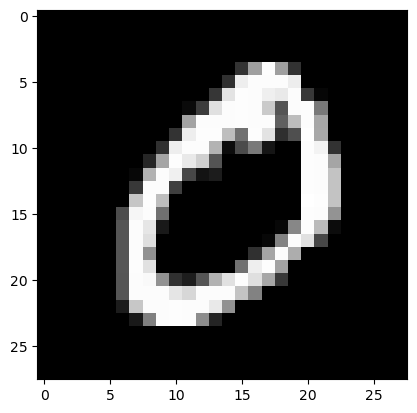

In [12]:
(X_train , y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
plt.imshow(X_train[1], cmap='gray')

In [13]:
X_train[0].shape

(28, 28)

28*28=784 # unique features one feature per pixel still large compress it 
#to make learning easier , through out unnecessary or redundent Learning --> relation between features themselves as well as to target

In [16]:
X_train[0].min(),X_train[0].max()

(0, 255)

In [18]:
# make it between 0-1
X_train = X_train/255.
X_test =X_test/255.

In [19]:
# condense the features down set up an autoencoder ---> encoder and deconder combination

## Architecture

In [23]:
encoder_input = keras.Input(shape = (28,28,1),name='img') # image shape is 28*28 *1 (color chanels) for rgb color impage it will be 3
x = keras.layers.Flatten()(encoder_input)# flatten input intu 784 dim vector
# add dense layer 
encoder_out = keras.layers.Dense(units = 64, activation = "relu")(x)

In [27]:
encoder = keras.Model(encoder_input, encoder_out, name = 'encoder') # input mathches input so 28*28 should come back as 28*28 as output
 # next get back orginal dim 28*28
# architecture can be anything just map input to input as is in terms of dimension


In [29]:
decoder_input = keras.layers.Dense(units = 784, activation='relu')(encoder_out)
decoder_out = keras.layers.Reshape((28,28,1))(decoder_input)

optimizer = keras.optimizers.Adam(learning_rate = 0.001, decay = 1e-6)

/opt/anaconda3/lib/python3.11/site-packages/keras/src/optimizers/base_optimizer.py:33: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


In [30]:
autoencoder = keras.Model(encoder_input,decoder_out,name = 'autoencoder')
autoencoder.summary()

Model: "autoencoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ img (InputLayer)                │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 784)            │        50,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 28, 28, 1)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,200 (395.31 KB)

 Trainable params: 101,200 (395.31 KB)

 Non-trainable params: 0 (0.00 B)

## Train 

In [31]:
autoencoder.compile(optimizer = optimizer, loss='mse')

In [33]:
autoencoder.fit(X_train, X_train, epochs = 3, batch_size = 32, validation_split = 0.1) # encoder compress decoder decompress to check if encoding is good to get original back as it was

Epoch 1/3
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 611us/step - loss: 0.0278 - val_loss: 0.0116
Epoch 2/3
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 568us/step - loss: 0.0113 - val_loss: 0.0108
Epoch 3/3
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 592us/step - loss: 0.0107 - val_loss: 0.0106


## test

In [34]:
X_test[0].shape ## need to reshape it as per required shape on encoder input dim

(28, 28)

In [35]:
encoded_example = encoder.predict([X_test[0].reshape(-1,28,28,1)])[0]
print(encoded_example)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
[0.         1.6165302  0.45890886 0.49588555 0.9380172  0.49901837
 1.7832775  0.6098811  1.0193408  0.3628998  0.6807686  2.0005083
 1.1176839  2.9470832  1.0070779  0.80600363 3.0837626  1.0590767
 1.2018869  1.036711   0.6102585  0.64778805 2.5178027  1.8837186
 0.18191619 1.0704607  0.         0.68251634 0.6656183  1.8355992
 0.78358835 0.731422   2.0616295  0.6030028  0.21217975 0.77708465
 0.         0.54264736 1.4311469  0.68807155 1.9689378  1.5428243
 0.28401113 1.866669   0.         0.94962645 0.07827485 0.73698497
 1.3255061  1.3653692  0.08148049 0.77996725 1.0053983  1.0613912
 0.66541255 0.37792605 0.7075665  0.61543524 0.65749097 1.2642475
 1.9181408  2.1305366  1.2995512  0.6693877 ]


In [36]:
encoded_example.shape

(64,)

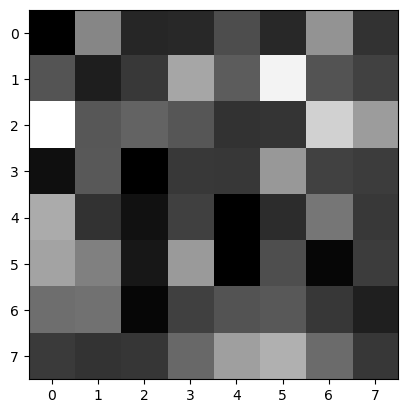

In [39]:
plt.imshow(encoded_example.reshape(8,8), cmap = 'gray')

In [40]:
en_de_example = autoencoder.predict([X_test[0].reshape(-1,28,28,1)])[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


In [41]:
en_de_example.shape

(28, 28, 1)

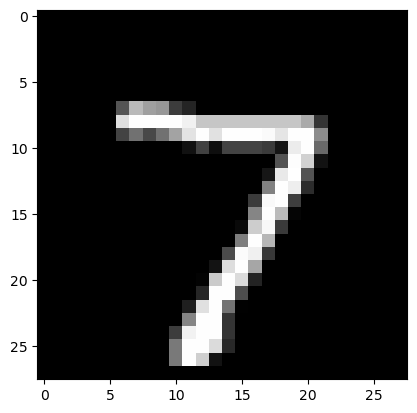

In [43]:
plt.imshow(X_test[0], cmap = 'gray')

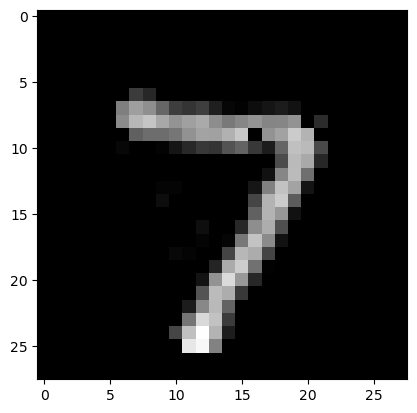

In [42]:
plt.imshow(en_de_example.reshape(28,28), cmap = 'gray')